<a href="https://colab.research.google.com/github/marcoss00/fundamentos_ia_data_science/blob/master/Atividade_3_Sample_distribution_and_sampling_distribution%2C_TLC_and_p_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baixando o pacote que permite buscar datasets diretamente do repositório UCI

In [15]:
pip install ucimlrepo

Importação das bibliotecas para cálculos numéricos, gráficos, estatística e manipulação de dados.

In [46]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import gamma, norm, binom

# A: sample distribution and sampling distribution

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

In [47]:
# Busca o dataset
cardiotocography = fetch_ucirepo(id=193)

# Guarda as features e as classes em dataframe
df_features = cardiotocography.data.features
df_class = cardiotocography.data.targets

# Junta as features e as classes em um unico dataframe
df = pd.concat([df_features, df_class], axis=1)

In [48]:
# Filtra a feature 'LB' onde a classe 'NSP' for 1 (normal)
acc_per_sec_normal = df[df['NSP'] == 1]['LB']

# Calcula a média e o desvio padrão dos dados reais filtrados
mean_real = np.mean(acc_per_sec_normal)
std_real = np.std(acc_per_sec_normal)

# Define a seed de geração de numeros aleatorios
# Serve para fixar a aleatoriedade, garantindo que o resultado dos números aleatórios seja sempre o mesmo toda vez que o código for executado.
np.random.seed(42)
# Quantidade de amostras
n_samples = 100
# Geração dos dados artificiais com distribuição normal com base nos dados reais
dados_artificiais = np.random.normal(loc=mean_real, scale=std_real, size=n_samples)

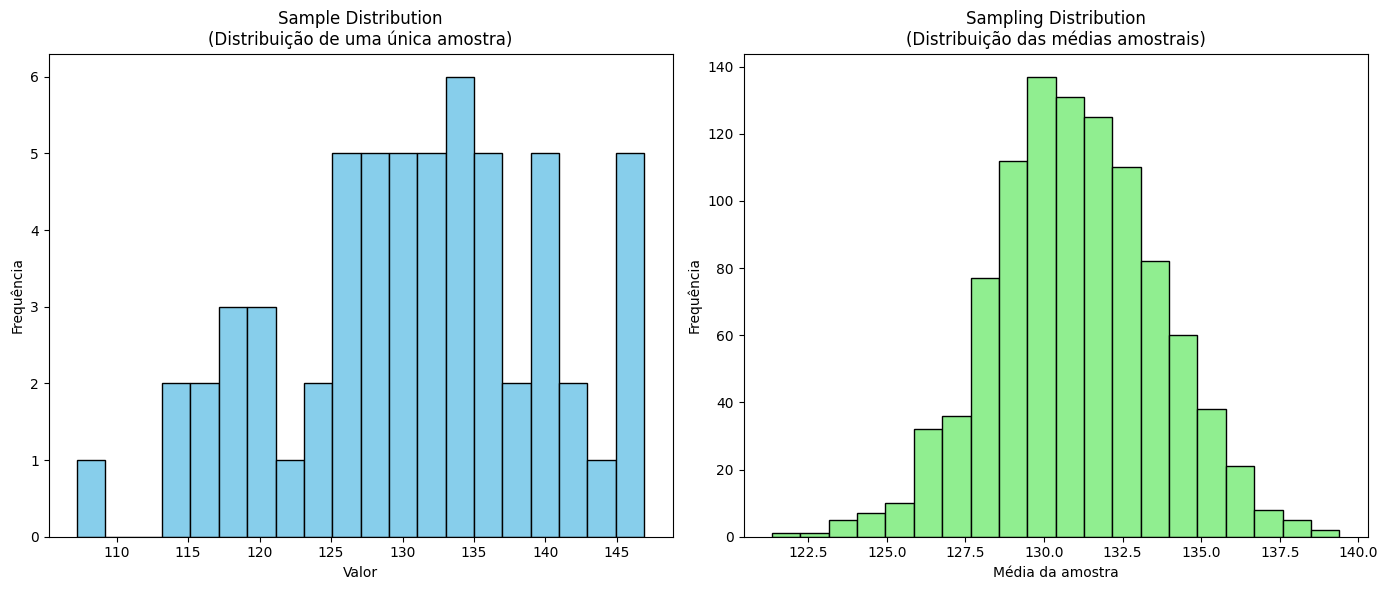

In [49]:
# ----------- Sample Distribution -----------
# Extraindo uma única amostra
amostra = np.random.choice(dados_artificiais, size=60, replace=False)

# ----------- Sampling Distribution -----------
# Tirando várias amostras e calculando suas médias
n_amostras = 1000
tamanho_amostra = 10
medias_amostras = []

for _ in range(n_amostras):
    amostra_temp = np.random.choice(dados_artificiais, size=tamanho_amostra, replace=False)
    medias_amostras.append(np.mean(amostra_temp))

plt.figure(figsize=(14, 6))

# Plot 1: Sample Distribution (valores da amostra única)
plt.subplot(1, 2, 1)
plt.hist(amostra, bins=20, color='skyblue', edgecolor='black')
plt.title('Sample Distribution\n(Distribuição de uma única amostra)')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Plot 2: Sampling Distribution (das médias das amostras)
plt.subplot(1, 2, 2)
plt.hist(medias_amostras, bins=20, color='lightgreen', edgecolor='black')
plt.title('Sampling Distribution\n(Distribuição das médias amostrais)')
plt.xlabel('Média da amostra')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


### Probabilidade de a média amostral ser maior que X

In [56]:
# Exemplo: Qual a probabilidade de a média de uma amostra ser maior que 55?
x = 130
media_amostral_teorica = mean_real
desvio_amostral_teorico = std_real / np.sqrt(tamanho_amostra)

prob_maior_que_x = 1 - norm.cdf(x, loc=media_amostral_teorica, scale=desvio_amostral_teorico)
print(f"P(μ > {x}) = {prob_maior_que_x:.4f}")

P(μ > 130) = 0.7464


### Probabilidade da média amostral estar entre dois valores

In [57]:
a, b = 132, 137
prob_intervalo = norm.cdf(b, loc=media_amostral_teorica, scale=desvio_amostral_teorico) - \
                 norm.cdf(a, loc=media_amostral_teorica, scale=desvio_amostral_teorico)
print(f"P({a} < μ < {b}) = {prob_intervalo:.4f}")

P(132 < μ < 137) = 0.4510


# B: TLC

Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

## Distribuição Gama

A distribuição **Gama** é uma distribuição contínua de probabilidade utilizada para modelar o tempo até a ocorrência de certos eventos, como o tempo até a falha de um equipamento ou o tempo entre chegadas em um processo de Poisson.

Sua função densidade de probabilidade (PDF) é dada por:

$$
f(x; k, \theta) = \frac{1}{\Gamma(k)\theta^k} x^{k-1} e^{-x/\theta}, \quad x > 0
$$

onde:

$$
k > 0 \quad \text{: parâmetro de forma (shape)}
$$

$$
\theta > 0 \quad \text{: parâmetro de escala (scale)}
$$

$$
\Gamma(k) = \int_0^\infty t^{k-1} e^{-t} \, dt \quad \text{: função gama}
$$

### Principais propriedades:

$$
\text{Média: } \mu = k\theta
$$

$$
\text{Variância: } \sigma^2 = k\theta^2
$$

OBS: quando \( k = 1 \), ela se torna a distribuição exponencial.

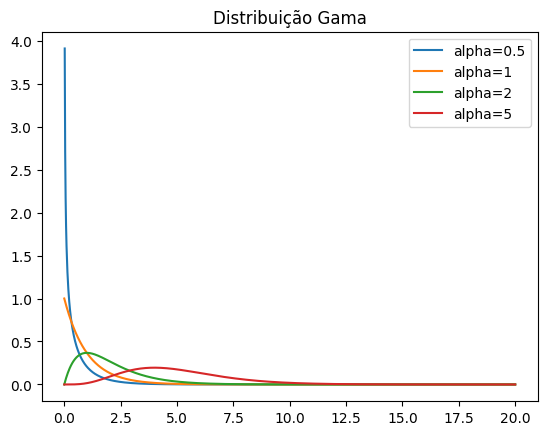

In [20]:
x = np.linspace(0, 20, 1000)
for a in [0.5, 1, 2, 5]:
    plt.plot(x, gamma.pdf(x, a, scale=1), label=f'alpha={a}')
plt.legend()
plt.title('Distribuição Gama')
plt.show()

### Aplicando **(TLC)** à distribuição Gama para observar como a média de amostras se aproxima de uma distribuição normal conforme o tamanho da amostra aumenta.

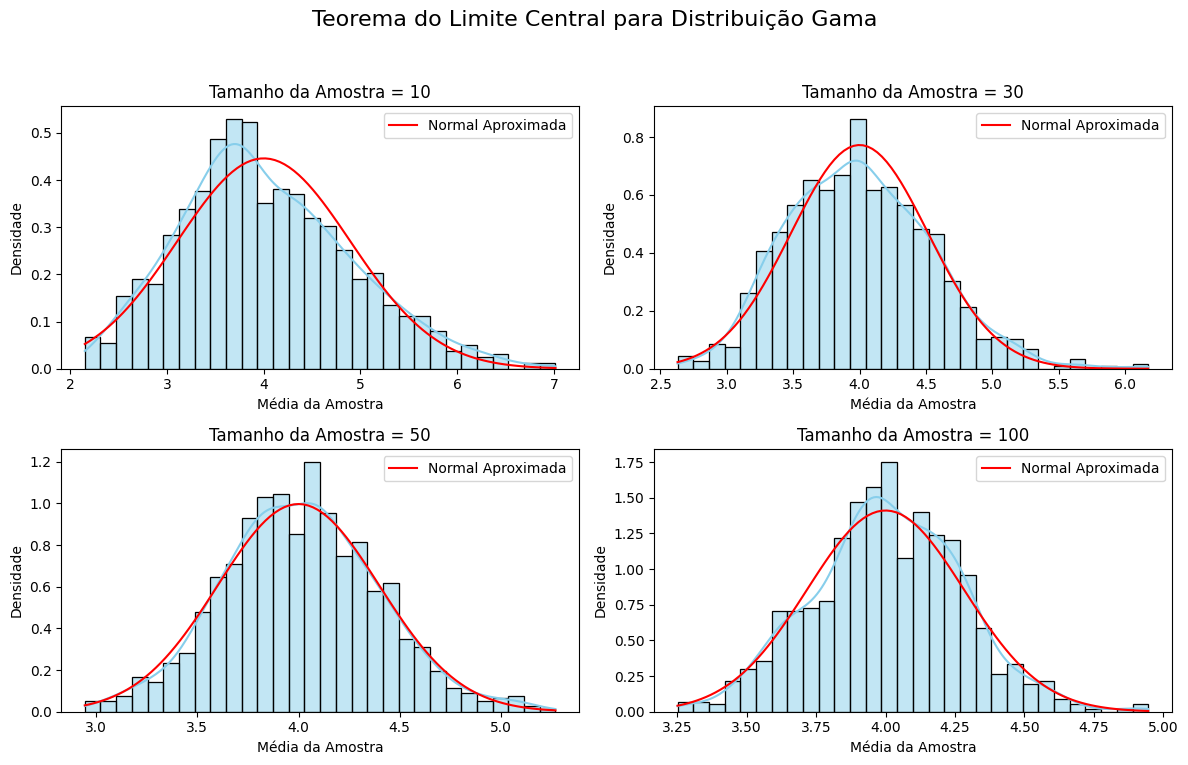

In [21]:
shape = 2.0
scale = 2.0

sample_sizes = [10, 30, 50, 100]
n_samples = 1000

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Aplicar o TLC para diferentes tamanhos de amostra
for idx, n in enumerate(sample_sizes):
    # Gerar várias amostras e calcular suas médias
    sample_means = [np.mean(gamma.rvs(a=shape, scale=scale, size=n)) for _ in range(n_samples)]

    # Plotar o histograma das médias amostrais
    sns.histplot(sample_means, kde=True, stat='density', ax=axes[idx], color='skyblue', bins=30)

    # Sobrepor curva Normal com mesma média e desvio padrão
    mean = shape * scale
    std = (np.sqrt(shape) * scale) / np.sqrt(n)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    axes[idx].plot(x, norm.pdf(x, mean, std), 'r', label='Normal Aproximada')

    axes[idx].set_title(f'Tamanho da Amostra = {n}')
    axes[idx].set_xlabel('Média da Amostra')
    axes[idx].set_ylabel('Densidade')
    axes[idx].legend()

plt.suptitle('Teorema do Limite Central para Distribuição Gama', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# C: p-value

Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

* Evento observado: C C C K C → 4 caras, 1 coroa.

* Total de lançamentos: 5.

* Queremos saber: qual é a probabilidade de obter um resultado tão extremo ou mais extremo que esse, supondo que a moeda é justa, (P(cara) = 0.5)

* H₀ (hipótese nula): a moeda é justa → P(cara) = 0.5

* H₁ (hipótese alternativa): a moeda não é justa → P(cara) ≠ 0.5

### A barra em cada posição mostra a probabilidade de obter aquele número de caras.

Valores mais prováveis: 2 ou 3 caras.

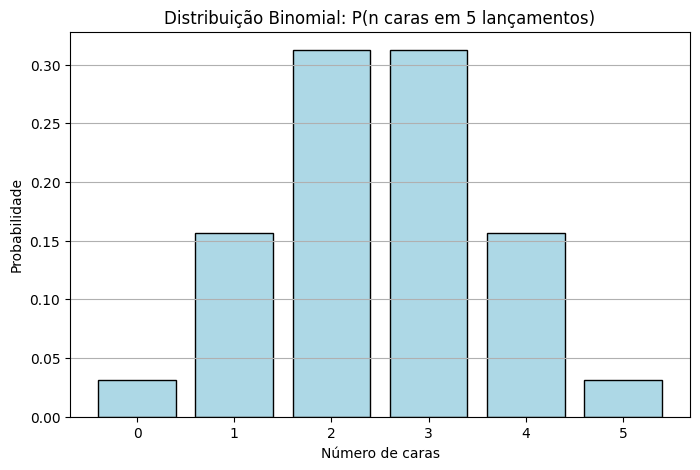

In [32]:
n = 5  # n de lançamentos
p = 0.5
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

plt.bar(x, pmf, color='lightblue', edgecolor='black')
plt.title('Distribuição Binomial: P(n caras em 5 lançamentos)')
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.xticks(x)
plt.grid(axis='y')
plt.show()

### A probabilidade de obter exatamente 4 caras é mostrada em laranja.

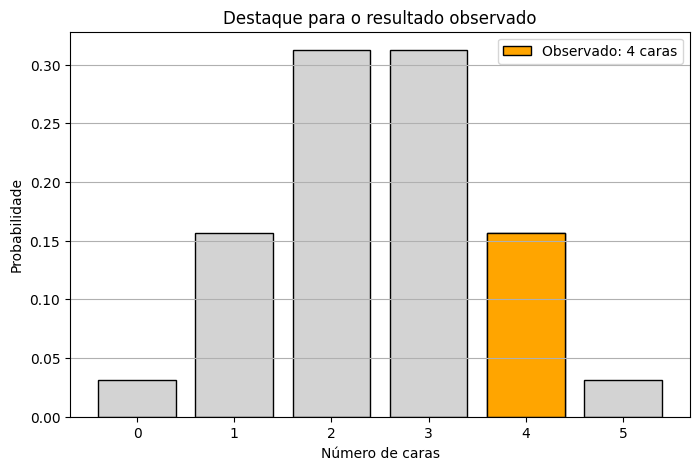

P(4 caras | moeda justa) = 0.156


In [34]:
observado = 4
plt.bar(x, pmf, color='lightgray', edgecolor='black')
plt.bar(observado, pmf[observado], color='orange', edgecolor='black', label='Observado: 4 caras')
plt.title('Destaque para o resultado observado')
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.xticks(x)
plt.legend()
plt.grid(axis='y')
plt.show()

print(f"P(4 caras | moeda justa) = {pmf[observado]:.3f}")


### Somamos as probabilidades de eventos tão extremos ou mais (vermelho no gráfico):

P(X ≤ 1) = P(0) + P(1)

P(X ≥ 4) = P(4) + P(5)

p-valor = P(X ≤ 1) + P(X ≥ 4)

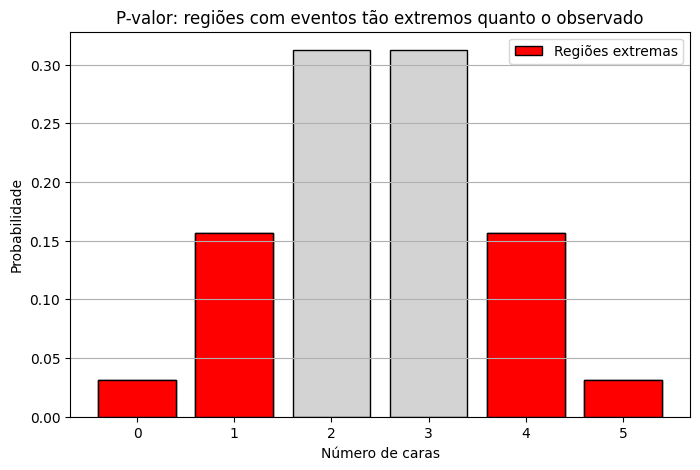

p-valor = 0.375


In [36]:
p_cima = binom.pmf(4, n, p) + binom.pmf(5, n, p)
p_baixo = binom.pmf(0, n, p) + binom.pmf(1, n, p)
p_valor = p_cima + p_baixo

plt.bar(x, pmf, color='lightgray', edgecolor='black')
plt.bar([0,1,4,5], binom.pmf([0,1,4,5], n, p), color='red', edgecolor='black', label='Regiões extremas')
plt.title('P-valor: regiões com eventos tão extremos quanto o observado')
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.xticks(x)
plt.legend()
plt.grid(axis='y')
plt.show()

print(f"p-valor = {p_valor:.3f}")


### Conclusão
* Se o p-valor < 0.05, rejeitamos a hipótese nula.

* Se for maior, não rejeitamos — o resultado é compatível com uma moeda justa.

In [37]:
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos H₀: a moeda pode não ser justa.")
else:
    print("Não rejeitamos H₀: o resultado é compatível com uma moeda justa.")

Não rejeitamos H₀: o resultado é compatível com uma moeda justa.


# D: p-value

Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).

Taxa de falsos negativos: 2.00%


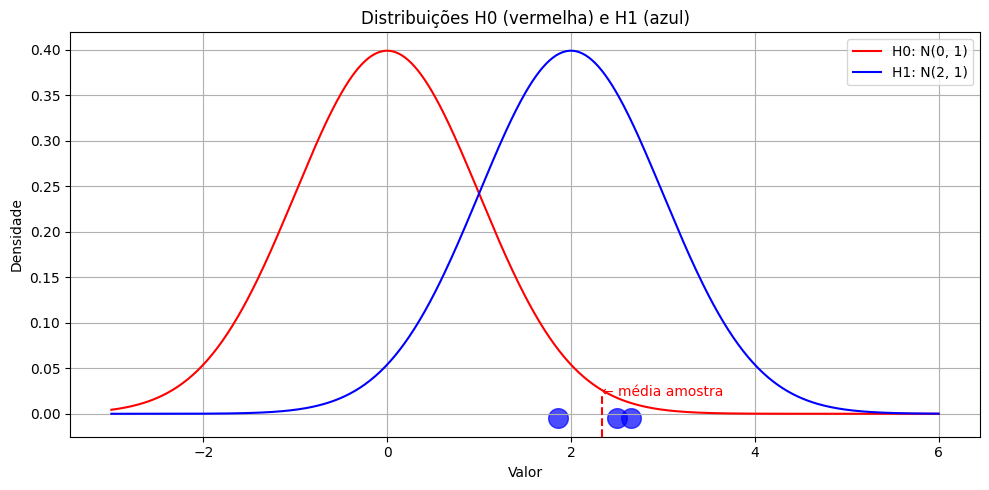

In [43]:
mu_red = 0       # média da vermelha (H0)
sigma_red = 1    # desvio padrão da vermelha
mu_blue = 2      # média da azul (H1)
sigma_blue = 1   # desvio padrão da azul

# 2. Gerar 100 amostras de 3 valores da azul
n_samples = 100
sequencia = 3

np.random.seed(42)
blue_samples = np.random.normal(mu_blue, sigma_blue, size=(n_samples, sequencia))

# 3. Calcular p-valores e contar falsos negativos
falsos_negativo = 0
p_values = []

for seq in blue_samples:
    sample_mean = np.mean(seq)
    # Estatística Z sob H0
    z = (sample_mean - mu_red) / (sigma_red / np.sqrt(sequencia))
    p_value = 1 - stats.norm.cdf(z)  # teste unilateral (cauda direita)
    p_values.append(p_value)
    if p_value > 0.05:
        falsos_negativo += 1

# 4. Taxa de falso negativos
false_negative_rate = falsos_negativo / n_samples
print(f"Taxa de falsos negativos: {false_negative_rate:.2%}")

# 5. Visualização das duas distribuições
x = np.linspace(-3, 6, 500)
red_pdf = stats.norm.pdf(x, mu_red, sigma_red)
blue_pdf = stats.norm.pdf(x, mu_blue, sigma_blue)

plt.figure(figsize=(10, 5))
plt.plot(x, red_pdf, color='red', label='H0: N(0, 1)')
plt.plot(x, blue_pdf, color='blue', label='H1: N(2, 1)')

# Três amostras ilustrativas
sample_example = blue_samples[0]
for val in sample_example:
    plt.scatter(val, -0.005, color='blue', alpha=0.7, s=200)

# Média da amostra (posição da seta vermelha)
mean_example = np.mean(sample_example)
plt.axvline(mean_example, color='red', linestyle='--', ymax=0.1)
plt.text(mean_example, 0.02, '← média amostra', color='red')

plt.legend()
plt.title("Distribuições H0 (vermelha) e H1 (azul)")
plt.xlabel("Valor")
plt.ylabel("Densidade")
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretação estatística

* Hipótese nula (H₀): os dados vêm da distribuição vermelha.

* Hipótese alternativa (H₁): os dados vêm de outra distribuição — no caso, a azul.

* Como os dados realmente vêm da azul, a hipótese nula é falsa.

* Quando o p-valor > 0.05, não rejeitamos a hipótese nula.

* Portanto, estamos cometendo um falso negativo (erro tipo II): a hipótese nula é falsa, mas não a rejeitamos.

* Erro tipo II (falso negativo):

 * Um erro tipo II ocorre quando não rejeitamos H₀, mesmo ela sendo falsa.

 * No experimento, isso aconteceu em 2% das amostras.

 * Ou seja, em 2% dos casos o teste falhou em detectar que os dados vinham da distribuição azul, aceitando como se fossem da vermelha.

* Conclusão geral:

 * A taxa de falsos negativos foi baixa (2%), o que indica que mesmo com pequenas amostras (n = 3), o teste tem boa sensibilidade para detectar a diferença entre as distribuições, dado que a diferença entre as médias é grande (0 vs. 2).

 * Porém, ainda existe risco de erro tipo II, especialmente se o tamanho da amostra fosse menor ou se as distribuições fossem mais próximas.